In [72]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
from scipy.signal.windows import hamming
import sounddevice as sd
import soundfile as sf
import librosa

In [91]:
# A function to plot signal
def plot_signal(s, i, time_axis, hop_size):
    plt.figure()
    plt.plot(time_axis[i*hop_size:(i*hop_size+win_size)],s)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
# A function to plot spectrogram   
def plot_spectrogram(spectrogram):
    plt.imshow(spectrogram)
    plt.show()

### 1.  Implement a function to compute power spectrogram. (1 point)

4410   2205   4410   65


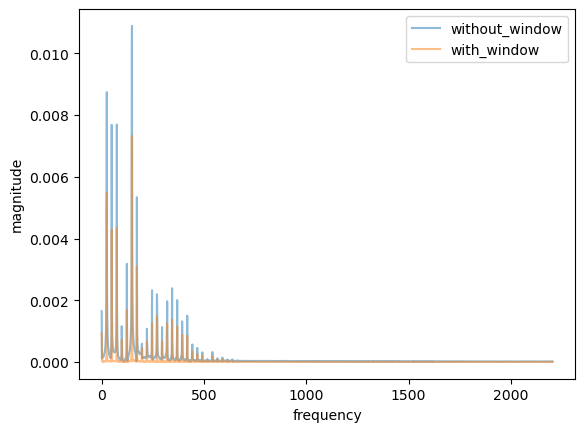

In [116]:
# Read audio
audio1, fs1 = sf.read("audio1.wav")

# Set parameters
time_axis = np.arange(0.0,len(audio1)/fs1, 1.0/fs1)
win_size = int(0.1*fs1) # number of signal points per 100ms
window = hamming(win_size)
hop_size = win_size // 2# b) Add overlap between consecutive signal frames.
# plot_signal(audio1, 0, time_axis, hop_size)
nfft = win_size
nframes = len(audio1) // (win_size // 2) - 1
print(win_size, " ", hop_size, " ", nfft, " ", nframes)
power_spectrogram = np.zeros((win_size, nframes))

# Loop through the frames
for i in np.arange(0, nframes):
    # Select audio frame
    segment=audio1[i*hop_size:i*hop_size+win_size]
    # a) Multiply each signal frame with a windowing function.
    segment_wind = segment * window
    
    # DFT spectrum
    spectrum = fft(segment, nfft)
    spectrum_wind = fft(segment_wind, nfft)
    # Select a frame and plot the spectrum with and without windowing.
    mag_spec = np.abs(spectrum)
    mag_spec_wind = np.abs(spectrum_wind)
    
    if (i == nframes//2):
        fig, ax = plt.subplots()
        ax.plot(mag_spec[:win_size//2]/win_size, alpha=0.5)
        ax.plot(mag_spec_wind[:win_size//2]/win_size, alpha=0.5)
        ax.legend(["without_window", "with_window"])
        ax.set_xlabel("frequency")
        ax.set_ylabel("magnitude")
        plt.show()
                
    # c) Collect the power spectrum into a matrix.
    power_spectrum = np.power(mag_spec, 2)
    power_spectrogram[:,i] = power_spectrum

3446.6915380246305

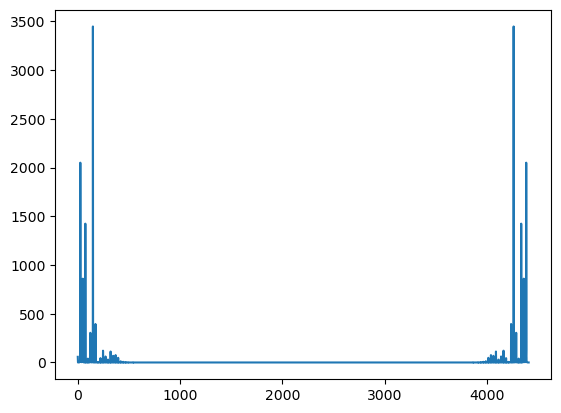

In [133]:
plt.plot(power_spectrogram[:,15])
np.max(power_spectrogram[:,15])

#### Plot the matrix (power_spectrogram) as an image.

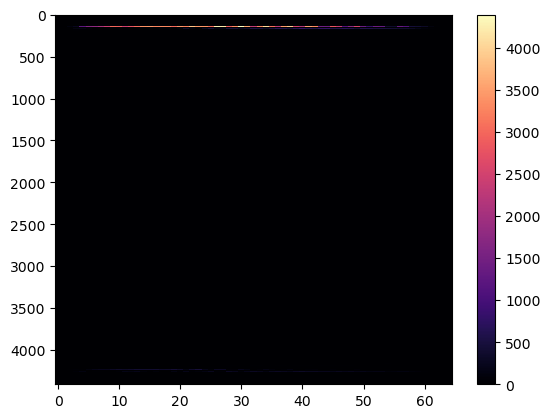

In [134]:
plt.imshow(power_spectrogram, cmap = 'magma', interpolation='nearest',  aspect='auto')
plt.colorbar()
plt.show()

#### Plot the logarithm of the matrix.

/tmp/ipykernel_2806/2246103168.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(power_spectrogram), cmap = 'magma', interpolation='nearest',  aspect='auto')


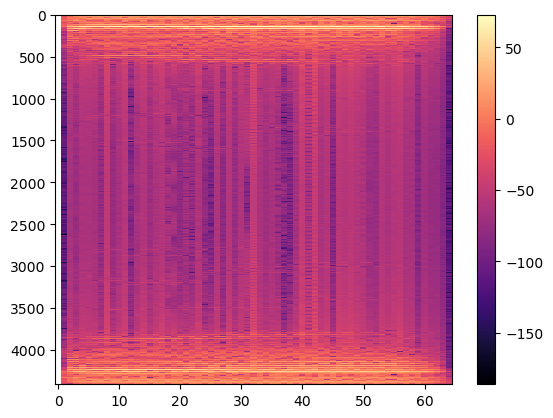

In [130]:
plt.imshow(20*np.log10(power_spectrogram), cmap = 'magma', interpolation='nearest',  aspect='auto')
plt.colorbar()
plt.show()

#### What differences do you observe?

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

#### Are there any differences from your own implementation?

#### b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

#### c) What happens when the window size is increased?

#### What analysis window lenght is best for each of the signal types?

### Bonus problem: Implement overlap-add reconstruction